In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [4]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1,1)

In [1]:
pip install --upgrade scikit-learn


In [5]:
encoder = OneHotEncoder(sparse_output=False)

y = encoder.fit_transform(y)


In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [8]:
def swish(x):
  return x*tf.keras.activations.sigmoid(x)



In [9]:
def build_model(activation_fn, name="model"):
  model = Sequential(name=name)
  model.add(Dense(10, input_shape=(4,), activation=activation_fn))
  model.add(Dense(10, activation=activation_fn))
  model.add(Dense(3, activation="softmax"))
  model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [10]:
activations={"ReLu":"relu","swish":swish,"tanh":"tanh","sigmoid":"sigmoid"}

In [15]:
history_dict = {}
for name,act_fn in activations.items():
  model=build_model(act_fn)
  history = model.fit(x_train,y_train,epochs=100,verbose=0)
  loss,acc=model.evaluate(x_test,y_test)
  print(f"Model with {name} activation: Loss = {loss:.4f}, Accuracy = {acc:.4f}")
  history_dict[name] = history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9667 - loss: 0.1875
Model with ReLu activation: Loss = 0.1875, Accuracy = 0.9667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9333 - loss: 0.1789
Model with swish activation: Loss = 0.1789, Accuracy = 0.9333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.9667 - loss: 0.1701
Model with tanh activation: Loss = 0.1701, Accuracy = 0.9667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8667 - loss: 0.6155
Model with sigmoid activation: Loss = 0.6155, Accuracy = 0.8667


Keys in history_dict: dict_keys(['ReLu', 'swish', 'tanh', 'sigmoid'])


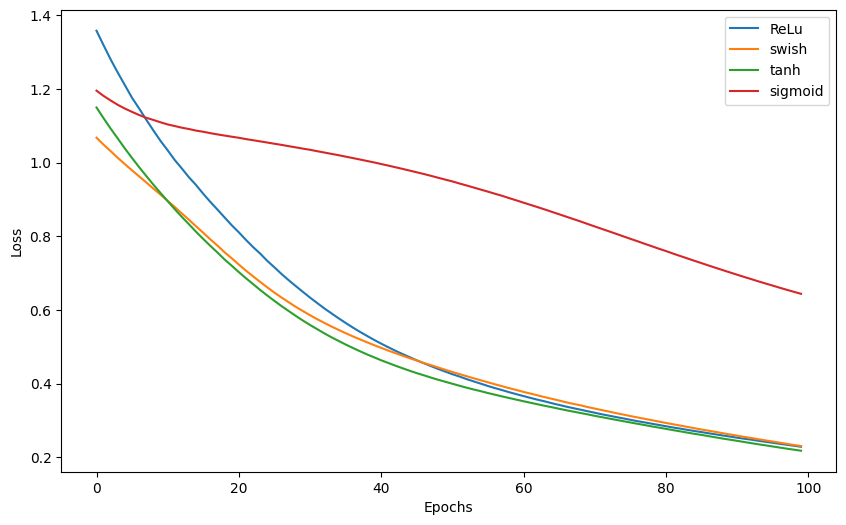

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
print("Keys in history_dict:", history_dict.keys())
for name,history in history_dict.items():
  plt.plot(history.history["loss"],label=name)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()